##### Lehrstuhl für Analytics and Statistics (IOR)
##### Prof. Dr. Oliver Grothe
##### WS 24/25

# Multivariate Verfahren
## Übung 5

### Aufgabe 5

Laden Sie aus Ilias den Datensatz *`staedte.csv`* Dieser enthält die Daten Ihres Rankings.
Führen Sie eine nicht-metrische Multidimensionale Skalierung durch.

#### Datenvorbereitung

- Daten einlesen:

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")
df = pd.read_csv("./staedte.csv",sep=',',header=None)
U = pd.DataFrame.to_numpy(df)
U # n-by-n dissimilarity matrix U

array([[ 0, 45, 17, 44, 42, 32, 31, 27, 25, 11],
       [45,  0, 34, 14, 12, 21, 35, 37, 25, 39],
       [17, 34,  0, 30, 18,  5,  4, 22,  9,  7],
       [44, 14, 30,  0,  1, 15, 24, 43, 38, 41],
       [42, 12, 18,  1,  0,  2, 13, 40, 28, 33],
       [32, 21,  5, 15,  2,  0, 10, 29, 16, 19],
       [31, 35,  4, 24, 13, 10,  0, 36, 23, 20],
       [27, 37, 22, 43, 40, 29, 36,  0,  3,  8],
       [25, 25,  9, 38, 28, 16, 23,  3,  0,  6],
       [11, 39,  7, 41, 33, 19, 20,  8,  6,  0]], dtype=int64)

*U : Unähnlichkeitsdaten*

*$u_{ij}=1$ für ähnlichstes Paar $(i,j)$*,

*$u_{ij}=45$ für unähnlichstes Paar $(i,j)$*.

#### Nicht-Metrische Multidimensionale Skalierung

- Define a function *cmdscale* for classical MDS to get Startconfiguration for non-metrical MDS

In [9]:
def cmdscale(D):
    """                                                                                       
    Classical multidimensional scaling (MDS)                                                  
                                                                                               
    Parameters                                                                                
    ----------                                                                                
    D : (n, n) array                                                                          
        Symmetric distance matrix.                                                            
                                                                                               
    Returns                                                                                   
    -------                                                                                   
    Y : (n, p) array                                                                          
        Configuration matrix. Each column represents a dimension. Only the                    
        p dimensions corresponding to positive eigenvalues of B are returned.                 
        Note that each dimension is only determined up to an overall sign,                    
        corresponding to a reflection.                                                        
                                                                                               
    e : (n,) array                                                                            
        Eigenvalues of B.                                                                     
                                                                                               
    """
    # Number of points                                                                        
    n = len(D)
 
    # Centering matrix                                                                        
    H = np.eye(n) - np.ones((n, n))/n
 
    # YY^T                                                                                    
    B = -H.dot(D**2).dot(H)/2
 
    # Decomposition                                                                             
    evals, evecs = np.linalg.eigh(B)
 
    # Sort by eigenvalue in descending order                                                  
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
 
    # Compute the coordinates using positive-eigenvalued components only                      
    w, = np.where(evals > 0)
    L  = np.diag(np.sqrt(evals[w]))
    V  = evecs[:,w]
    Y  = V.dot(L)
 
    return Y, evals

- Berechnung der Konfiguration $Y_0$ als Ausgangskonfiguration für non-classical MDS 

In [10]:
init_D,_ = cmdscale(U)
Y_0 = init_D[:,:2]
Y_0

array([[-20.50336672,   6.61718153],
       [ 18.87044902, -15.67610058],
       [ -6.16203912,   7.711578  ],
       [ 23.49977549,   1.80337848],
       [ 18.61759952,   3.48589364],
       [  6.74067193,   2.52497343],
       [  3.40726491,  14.87406087],
       [-17.67561534, -14.03755061],
       [ -9.52744842,  -9.07018123],
       [-17.26729128,   1.76676646]])

- Non-metric MDS Model festlegen und anpassen

In [11]:
# non-metric Multidimensional scaling with Pre-computed dissimilarities U and the Initialized configuration of points Y_0
from sklearn.manifold import MDS
nmds = MDS(n_components=2, metric=False,dissimilarity ='precomputed')
#nmds.fit(U)
nmds.fit(U,init=Y_0)

MDS(dissimilarity='precomputed', metric=False)

- Ausgabe Rohstress 

In [12]:
raw_stress=nmds.stress_
raw_stress

0.024237204999247478

- Ausgabe Konfiguration $Y$ 

*Konfiguration: Die Menge der Objekte und ihrer relativen Positionen zueinander*

In [13]:
Y=nmds.embedding_ # Y:  a configuration of n points (rows) in 2 dimensions (columns)
print('Konfiguration Y: ','\n', Y)

Konfiguration Y:  
 [[-0.62040965  0.26248087]
 [ 0.46862054 -0.40737617]
 [-0.12065614  0.1529356 ]
 [ 0.63852291  0.04198657]
 [ 0.45106682  0.07995669]
 [ 0.17506697  0.04538916]
 [ 0.08605084  0.35341209]
 [-0.44436516 -0.34032058]
 [-0.22826401 -0.23113681]
 [-0.42400553  0.04293084]]


- Plot der Konfiguration im Wahrnehmungsraum

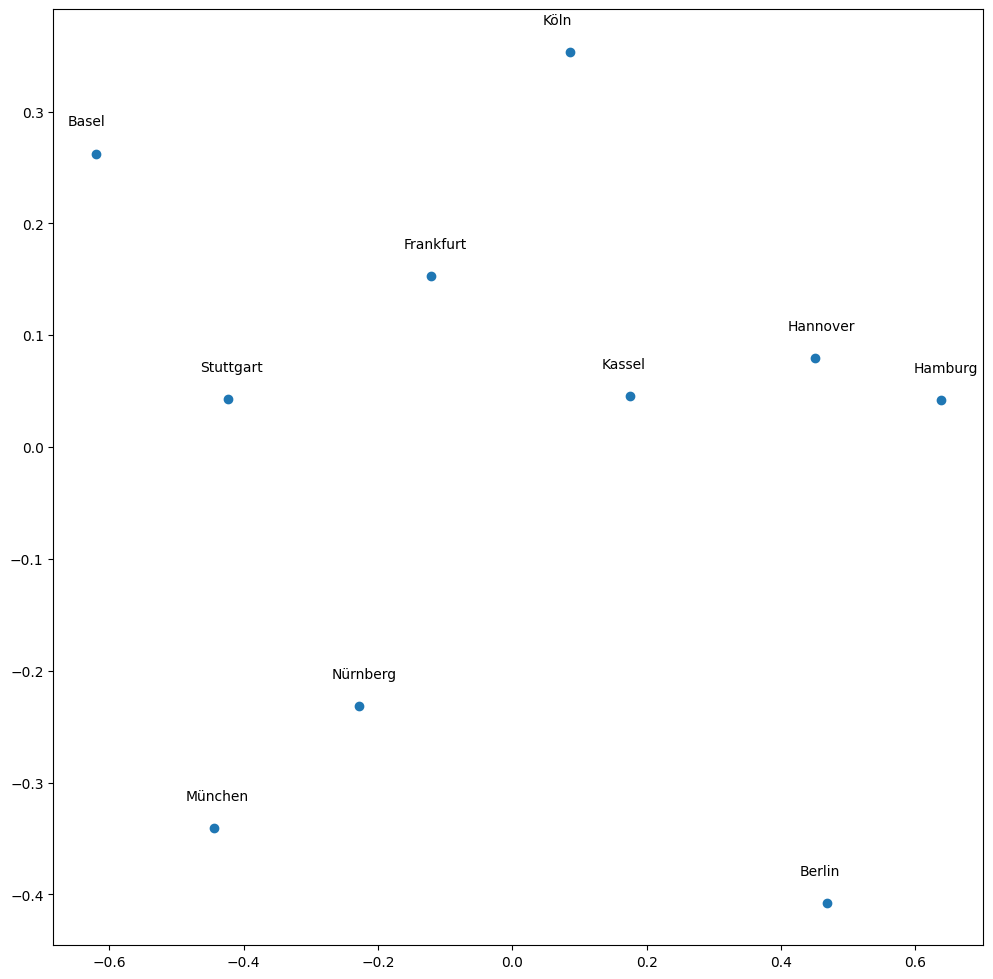

In [14]:
cities = ['Basel','Berlin','Frankfurt','Hamburg','Hannover','Kassel','Köln','München','Nürnberg','Stuttgart']
coords = nmds.embedding_

fig = plt.figure(figsize=(12,12))

plt.subplots_adjust(bottom = 0.1)
plt.scatter(coords[:, 0], coords[:, 1])

for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), 
        xytext = (-20, 20),
        textcoords = 'offset points'
    )
plt.show()